# Contexto IA
## Aprendisagem Supervisionada
## Projeto: valor da casa em Boston

In [17]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import ShuffleSplit

# Permite visualizar os dados da melhor forma possível
# como estamos utilizando um arquivo HTML, o método display irá exibir uma tabela
# veja mais em: https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#module-IPython.display
from IPython.display import display

# Carregar os dados
full_data = pd.read_csv('housing_data.csv')
prices = full_data['VALOR']
features = full_data.drop('VALOR', axis = 1)
    
display(full_data)

,MQTD,PVIZ,VALOR
0,6.575,4.98,504000
1,6.421,9.14,453600
2,7.185,4.03,728700
3,6.998,2.94,701400
4,7.147,5.33,760200
5,6.430,5.21,602700
6,6.012,12.43,480900
7,6.172,19.15,569100
8,5.631,29.93,346500
9,6.004,17.10,396900


## Dimensões

- **MQTD**: média de quartos
- **PVIZ**: quantidade em % de vizinhos probres
- **VALOR**: valor médio da casa

## Anális de Dados

### Calcúle as informações estatísticas padrões para o valor

- existe alguma relação entre o MQTD e o valor?
- existe alguma relação entre o PVIZ e o valor?

In [23]:
# TODO: menor valor
minimum_price = np.amin(prices)
print ("menor valor:\t ${:,.2f}".format(minimum_price))

# TODO: maior valor
maximum_price = np.amax(prices)
print ("maior valor:\t ${:,.2f}".format(maximum_price))

# TODO: valor médio
mean_price = np.mean(prices)
print ("valor médio:\t ${:,.2f}".format(mean_price))

# TODO: valor mediano
median_price = np.median(prices)
print ("valor mediano\t ${:,.2f}".format(median_price))

# TODO: desvio padrão
std_price = np.std(prices)
print ("desvio padrão:\t ${:,.2f}".format(std_price))

# TODO: use corr()
full_data.corr()





menor valor:	 $105,000.00
maior valor:	 $1,024,800.00
valor médio:	 $454,342.94
valor mediano	 $438,900.00
desvio padrão:	 $165,171.13


,MQTD,PVIZ,VALOR
MQTD,1.000000,-0.612033,0.697209
PVIZ,-0.612033,1.000000,-0.760670
VALOR,0.697209,-0.760670,1.000000


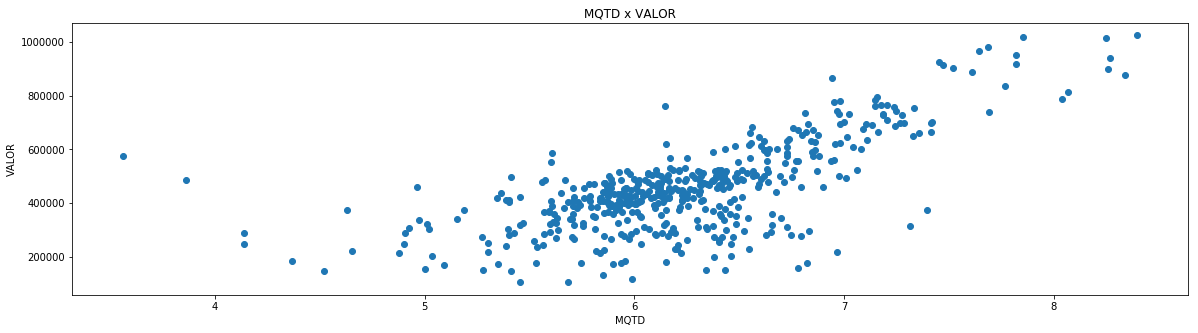

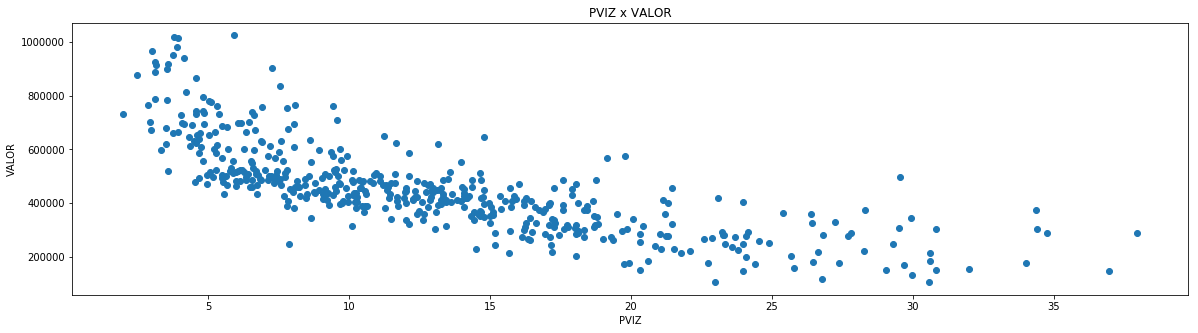

In [35]:
import matplotlib.pyplot as plt

# TODO: monte o gráfico MQTD x VALOR
plt.figure(figsize=(20, 5))
plt.plot(features['MQTD'], prices, 'o')
plt.title('MQTD x VALOR')
plt.xlabel('MQTD')
plt.ylabel('VALOR')
plt.show()

# TODO: monte o gráfico PVIZ x VALOR
plt.figure(figsize=(20, 5))
plt.plot(features['PVIZ'], prices, 'o')
plt.title('PVIZ x VALOR')
plt.xlabel('PVIZ')
plt.ylabel('VALOR')
plt.show()

### Resposta
digite a sua resposta

## Desenvolvendo o modelo

- qual foi o melhor score encontrado?
- qual o melhor modelo?
- o que a configuração do modelo influência com o overfitting e o underfitting?

### split [training set and test set]

In [66]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# # TODO: crie o training set e o test set da forma 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(features.values, prices.values, test_size=0.2, random_state=42)

### criando o modelo

#### NeuralNetwork

In [141]:
# TODO: Import 'MLPRegressor'
from sklearn.neural_network import MLPRegressor

# TODO: crie uma instancia do modelo do tipo MLPRegressor com solver = 'lbfgs' (porque?), random_state = 42 (porque?)
model = MLPRegressor(activation='relu', solver='lbfgs', random_state=42)

# TODO: treine o modelo
model.fit(X_train, y_train)

# TODO: imprima o score do treino o do teste
print ('training score:\t', model.score(X_train, y_train))
print ('test score:\t', model.score(X_test, y_test))

training score:	 0.764870706853
test score:	 0.739985931768


#### KnN

- compare o resultado da rede neural com o do KnN
- teste diferentes n_neighbors

In [124]:
# TODO: Import 'KNeighborsRegressor'
from sklearn.neighbors import KNeighborsRegressor

# TODO: crie uma instancia do modelo do tipo KNeighborsRegressor
model = KNeighborsRegressor()

# TODO: treine o modelo
model.fit(X_train, y_train)

# TODO: imprima o score do treino o do teste
print ('training score:\t', model.score(X_train, y_train))
print ('test score:\t', model.score(X_test, y_test))

training score:	 0.851467788398
test score:	 0.769651904939


#### Essembler (AdaBuster)

- compare o resultados com os demais

In [140]:
# TODO: Import 'AdaBoostRegressor'
from sklearn.ensemble import AdaBoostRegressor

# TODO: crie uma instancia do modelo do tipo AdaBoostRegressor com random_state = 42
model = AdaBoostRegressor(loss='exponential', n_estimators=1, random_state=42)

# TODO: treine o modelo
model.fit(X_train, y_train)

# TODO: imprima o score do treino o do teste
print ('training score:\t', model.score(X_train, y_train))
print ('test score:\t', model.score(X_test, y_test))

training score:	 0.806356592892
test score:	 0.7764457097


### Bias x Variance

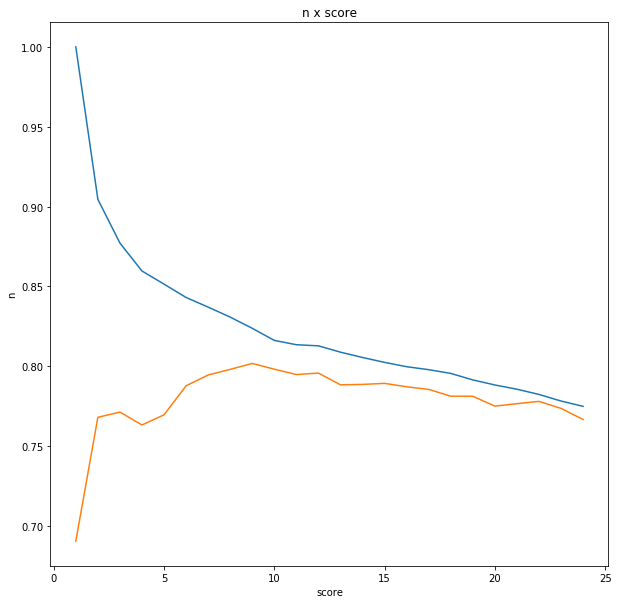

In [165]:
# TODO: Import 'KNeighborsRegressor'
from sklearn.neighbors import KNeighborsRegressor

# TODO: crie uma instancia do modelo do tipo KNeighborsRegressor n_neighbors = n
# TODO: treine o modelo e adicione os scores nos arrays
train_scores = []
test_scores = []
n = 25
for i in range(1, n):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# TODO: imprima o gráfico train_scores x test_scores
plt.figure(figsize=(10, 10))
plt.plot(range(1, n), train_scores)
plt.plot(range(1, n), test_scores)
plt.title('n x score')
plt.xlabel('score')
plt.ylabel('n')
plt.show()

### Resposta
digite a sua resposta